In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Cassiopeia, install this version: https://github.com/pjb7687/Cassiopeia
# The orignal version is available at https://cassiopeia-lineage.readthedocs.io/en/latest/
from cassiopeia.TreeSolver.Node import Node
from cassiopeia.TreeSolver.lineage_solver import lineage_solver as ls

# ForceAtlas2, available at https://pypi.org/project/ForceAtlas2
from fa2 import ForceAtlas2

/home/pjb7687/.local/lib/python3.7/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [28]:
# Assuming that the "gisaid_cov2020_sequences.fasta" file exists at the working directory.
# According to the EULA, this file should be downloaded directly from GISAID website.

# FAMSA, available at https://github.com/refresh-bio/FAMSA
# GPU acceleration doesn't seem to work, but it is still quite fast
!famsa-gpu-1.3.2-linux gisaid_cov2020_sequences.fasta aligned.fasta

FAMSA (Fast and Accurate Multiple Sequence Alignment) ver. 1.3.2 CPU and GPU
  by S. Deorowicz, A. Debudaj-Grabysz, A. Gudys (2020-02-21)

^C


In [29]:
with open("aligned.fasta") as f, open("aligned_nospaces.fasta", "w") as fo:
    for line in f:
        if line[0] == '>':
            line = line.replace(" ", "_")
        fo.write(line)

In [30]:
# SNP-sites, available at https://github.com/sanger-pathogens/snp-sites
!snp-sites -v -c -o variants.vcf aligned_nospaces.fasta

In [31]:
var_vecs = []
var_ids = []
with open("variants.vcf") as f:
    for line in f:
        if line[0] == "#":
            if line[1] != "#":
                headers = np.array(line.strip().replace("|", "@").split('\t')[9:]) # bar sign can confuse Cassiopeia
            continue
        entries = line.strip().split('\t')
        if "," in entries[4]:
            print("Found multiple SNVs at the same site!")
            continue # ignore multiple SNVs (so far this has never happened yet)
        var_ids.append("_".join([entries[1], entries[3], entries[4]]))
        var_vecs.append([int(i) for i in entries[9:]])
var_mat = np.array(var_vecs).T

In [24]:
# Dedupicate the same strains
vecs_stringified = np.array(['|'.join(map(str, v)) for v in var_mat])
uniq_vecs, uniq_indices = np.unique(vecs_stringified, return_index = True)
uniq_headers = ['\n'.join(headers[vs == vecs_stringified]) for vs in np.unique(vecs_stringified)]

var_mat_uniq = var_mat[uniq_indices, :]

In [26]:
nodes = [Node(str(node_id), node_vec) for node_id, node_vec in enumerate(var_mat_uniq)]
tree = ls.solve_lineage_instance(nodes, method="ilp")[0]
net = tree.get_network().to_undirected()

Using 6 threads, 6 available.
Sending off Target Sets: 18
Started new thread for: 1|1|1|1|1|1|1|1|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|

Started new thread for: 1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|1|0|0|0|0|0|0|1|1|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|2|1|2|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|2|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|1|1|1|1|1|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|1|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|1|0|0|0|1|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|1|1|

  Objective range  [0e+00, 0e+00]
Changed value of parameter Method to 4
LCA Distance 0 completed with a neighborhood size of 9 (pid: c9fff2a9c1df013e4460888faad90b94)
  Bounds range     [0e+00, 0e+00]
Presolve: All rows and columns removed
LCA Distance 20 completed with a neighborhood size of 2 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
   Prev: -1  Min: -1  Max: 5  Default: -1
LCA Distance 5 completed with a neighborhood size of 4 (pid: 465a00262b3281fb90759376b8519f99)
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 0 columns
LCA Distance 10 completed with a neighborhood size of 4 (pid: 465a00262b3281fb90759376b8519f99)
Changed value of parameter TimeLimit to 1800.0
LCA Distance 25 completed with a neighborhood size of 2 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.0.1 build v9.

LCA Distance 125 completed with a neighborhood size of 2 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
LCA Distance 5 completed with a neighborhood size of 11 (pid: c9fff2a9c1df013e4460888faad90b94)
LCA Distance 130 completed with a neighborhood size of 2 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
Estimating potential graph with maximum neighborhood size of 10000 with lca distance of 10 (pid: 3ec645c0792a9f954c9956b580c6811d)
Started new thread for: 1|1|1|1|1|1|1|1|1|1|1|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|2|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1|0|0|0|0|0|0|0|0|0|0

Changed value of parameter Threads to 1
Coefficient statistics:
LCA Distance 214 completed with a neighborhood size of 3 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
   Prev: 0  Min: 0  Max: 1024  Default: 0
  Matrix range     [5e-01, 1e+00]
LCA Distance 219 completed with a neighborhood size of 3 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
Changed value of parameter Presolve to 2
  Objective range  [1e+00, 8e+00]
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPFocus to 1
  Bounds range     [1e+00, 2e+00]
   Prev: 0  Min: 0  Max: 3  Default: 0
LCA Distance 224 completed with a neighborhood size of 3 (pid: 022bf4fee2a46b76266cc0acb28b8ff1)
LCA Distance 1 completed with a neighborhood size of 15 (pid: 4e87ffb400e2ab5eb42ffa06a32e6b50)
  RHS range        [1e+00, 2e+00]
Changed value of parameter Cuts to 1
Presolve removed 6 rows and 6 columns
   Prev: -1  Min: -1  Max: 3  Default: -1
Changed value of parameter Method to 4
Presolve time: 0.00s
Presolve: All rows and columns 


LCA Distance 5 completed with a neighborhood size of 16 (pid: 4e87ffb400e2ab5eb42ffa06a32e6b50)
Explored 1 nodes (13 simplex iterations) in 0.13 seconds
Thread count was 1 (of 6 available processors)
LCA Distance 8 completed with a neighborhood size of 20 (pid: c9fff2a9c1df013e4460888faad90b94)
LCA Distance 1 completed with a neighborhood size of 8 (pid: e5f72549f6cc402b5ced14ad7ef57d53)

Solution count 2: 57 89 

Optimal solution found (tolerance 1.00e-02)
Best objective 5.700000000000e+01, best bound 5.700000000000e+01, gap 0.0000%
LCA Distance 2 completed with a neighborhood size of 8 (pid: e5f72549f6cc402b5ced14ad7ef57d53)
LCA Distance 1 completed with a neighborhood size of 22 (pid: e902c0945fd1ed21400a474aae6afd1a)
LCA Distance 5 completed with a neighborhood size of 8 (pid: e5f72549f6cc402b5ced14ad7ef57d53)
LCA Distance 6 completed with a neighborhood size of 16 (pid: 4e87ffb400e2ab5eb42ffa06a32e6b50)
LCA Distance 10 completed with a neighborhood size of 8 (pid: e5f72549f6cc402

LCA Distance 13 completed with a neighborhood size of 38 (pid: e902c0945fd1ed21400a474aae6afd1a)
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (linux64)
LCA Distance 27 completed with a neighborhood size of 37 (pid: c9fff2a9c1df013e4460888faad90b94)
Optimize a model with 273 rows, 470 columns and 940 nonzeros
Model fingerprint: 0x231b4bad
Variable types: 0 continuous, 470 integer (235 binary)
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 230.0000000
Presolve removed 84 rows and 95 columns
Presolve time: 0.00s
Presolved: 189 rows, 375 columns, 751 nonzeros
Found heuristic solution: objective 203.0000000
Variable types: 0 continuous, 375 integer (220 binary)
Presolve removed 160 rows and 213 columns
Presolved: 29 rows, 162 columns, 321 nonzeros


Root relaxation: objective 4.773212e+01, 20 iterations, 0.01 seconds

    Nodes    |    Curren

Presolved: 61 rows, 602 columns, 1190 nonzeros


Root relaxation: objective 1.066000e+02, 73 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  106.60000    0   18  277.00000  106.60000  61.5%     -    0s
H    0     0                     267.0000000  106.60000  60.1%     -    0s
H    0     0                     249.0000000  106.60000  57.2%     -    0s
     0     0  132.23333    0   56  249.00000  132.23333  46.9%     -    0s
H    0     0                     237.0000000  132.23333  44.2%     -    0s
     0     0  134.85000    0   25  237.00000  134.85000  43.1%     -    0s
     0     0  134.99074    0   27  237.00000  134.99074  43.0%     -    0s
     0     0  137.84600    0   60  237.00000  137.84600  41.8%     -    0s
H    0     0                     195.0000000  137.84600  29.3%     -    0s
     0     0  138.64879    0   54  195.00000  138.64879

 20490 10986  169.00000   52    7  178.00000  160.01837  10.1%   9.5   25s
 35210 10735  142.79861   74   16  145.00000  140.87921  2.84%  11.9   25s
LCA Distance 4 completed with a neighborhood size of 154 (pid: 674feba8ccd5be9758b7b96495e99425)
 42107 12592  143.83052   73   30  145.00000  140.89440  2.83%  11.9   30s
 27533 15351  160.90000   43   21  178.00000  160.30000  9.94%   8.8   31s
 32719 18721  160.36242   48   43  178.00000  160.36242  9.91%   8.3   35s
 49134 14515  141.50563   62   33  145.00000  140.90307  2.83%  12.0   35s
 39956 23058  170.13615   59   23  178.00000  160.47169  9.85%   7.8   40s
 56396 16704     cutoff   57       145.00000  140.91236  2.82%  11.9   40s
 44246 25524  176.81165   55   23  178.00000  160.52650  9.82%   7.7   45s
 63307 18662  141.52440   70   26  145.00000  140.92063  2.81%  11.9   45s
LCA Distance 5 completed with a neighborhood size of 162 (pid: 674feba8ccd5be9758b7b96495e99425)
 49098 27832  163.39911   57   46  178.00000  160.60110 

 287046 133231  168.36296   60   34  178.00000  163.86374  7.94%   7.8  265s
 372310 88933  143.05042   97   31  145.00000  141.34545  2.52%  12.5  265s
 292300 135545  176.70000   66    6  178.00000  163.90000  7.92%   7.8  270s
 379789 90295  141.40797   64   49  145.00000  141.36061  2.51%  12.5  270s
LCA Distance 16 completed with a neighborhood size of 219 (pid: 674feba8ccd5be9758b7b96495e99425)
 297954 137807     cutoff   68       178.00000  163.91708  7.91%   7.8  275s
 386327 91273  142.82287   79   73  145.00000  141.37490  2.50%  12.5  275s
 302632 139458  172.75208   51   28  178.00000  163.95208  7.89%   7.8  280s
 394211 92566  142.30766   66   63  145.00000  141.38797  2.49%  12.5  280s
 308719 141756  167.42769   65   22  178.00000  164.00000  7.87%   7.8  285s
 400178 93568  142.48151   84   26  145.00000  141.39843  2.48%  12.5  285s
 313252 143457  168.01667   61   13  178.00000  164.02484  7.85%   7.8  290s
 408479 95210  142.63533   80   65  145.00000  141.41404  2.

KeyboardInterrupt: 

Solution count 10: 145 145 146 ... 186

Solve interrupted
Best objective 1.450000000000e+02, best bound 1.420000000000e+02, gap 2.0690%
CASE 1: X-Y->Z, X->Z


In [8]:
unknown_idx = 1
for n in net:
    try:
        n.name = "Node_" + str(list(vecs_stringified[uniq_indices]).index(n.name.split('_')[0]))
    except:
        n.name = "Unknown_" + str(unknown_idx)
        unknown_idx += 1

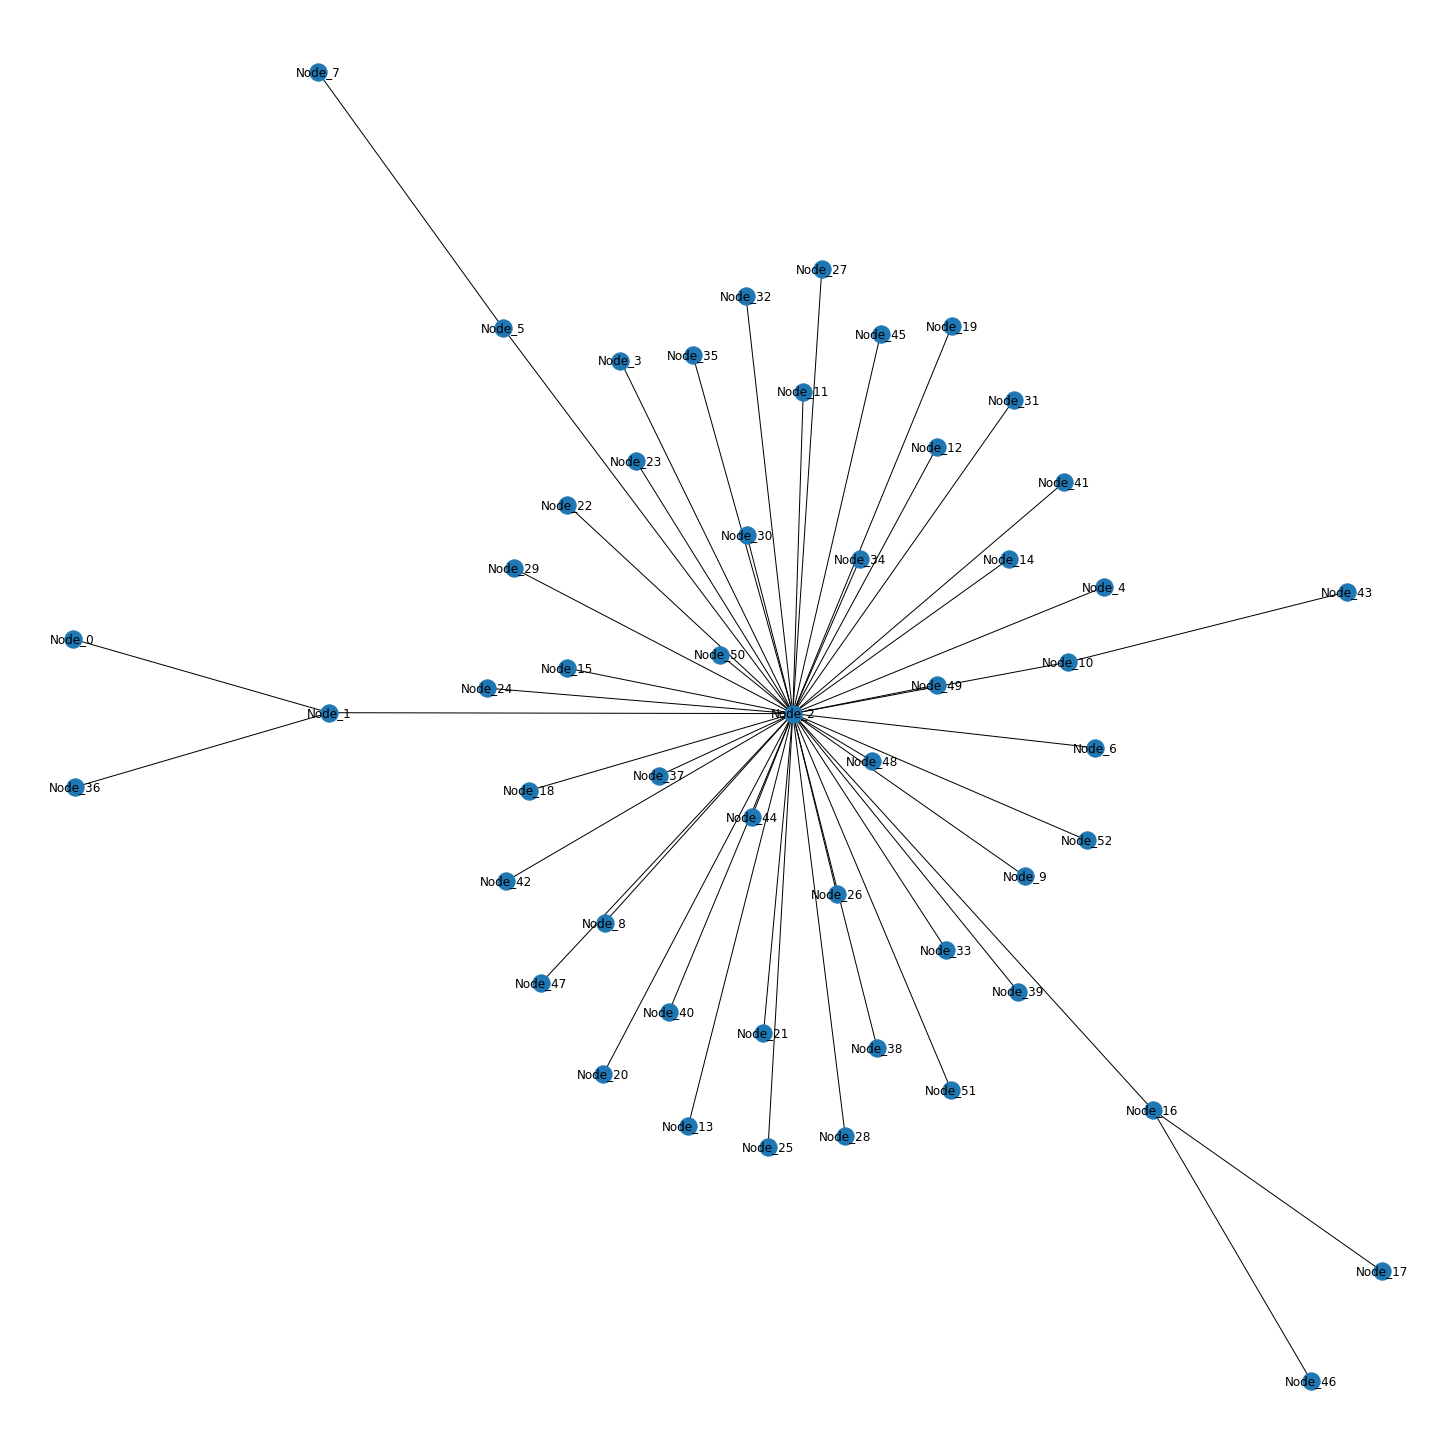

In [9]:
plt.figure(figsize=[20, 20])
nx.draw(net, with_labels=True)
pass

In [10]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.5,
                        strongGravityMode=False,
                        gravity=2,

                        # Log
                        verbose=True)

In [11]:
pos_fa2 = forceatlas2.forceatlas2_networkx_layout(net, pos=nx.spring_layout(net), iterations=10000)

100%|██████████| 10000/10000 [00:00<00:00, 10997.48it/s]

BarnesHut Approximation  took  0.22  seconds
Repulsion forces  took  0.46  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.10  seconds


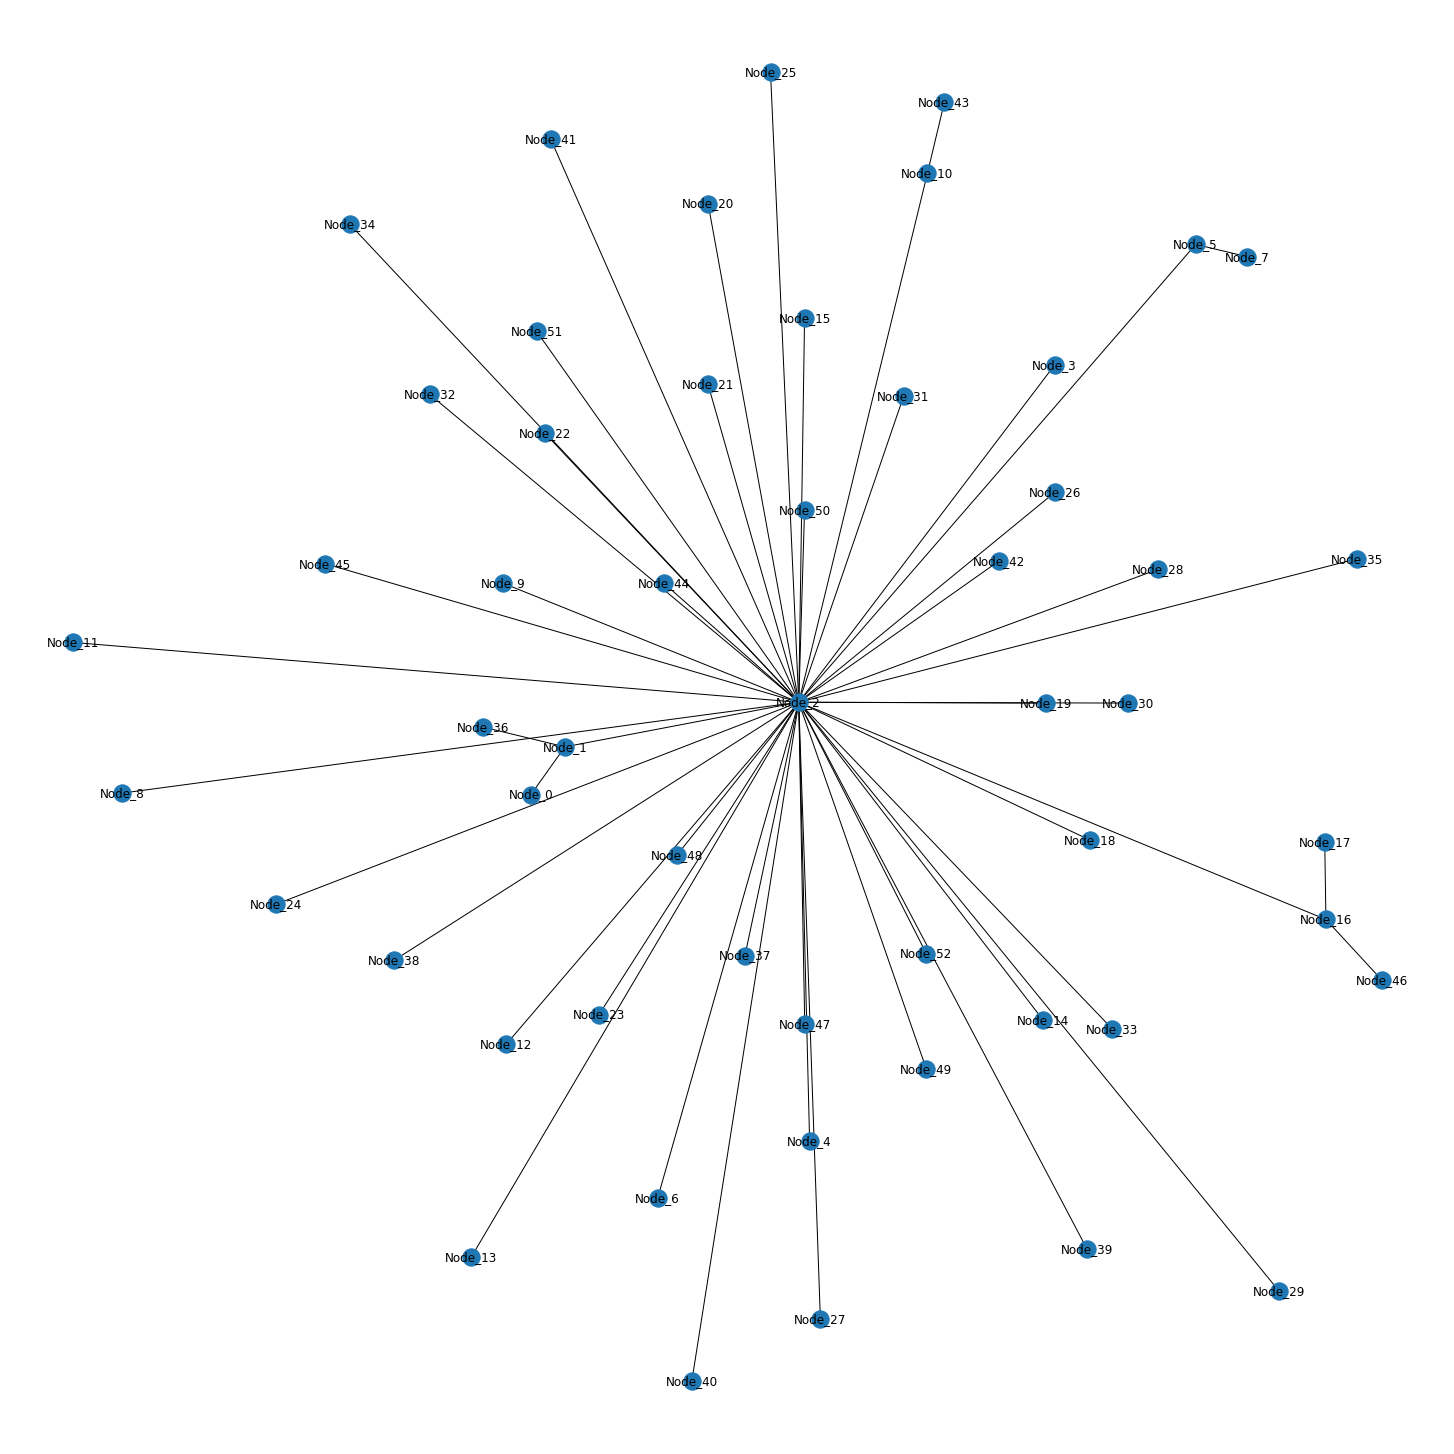

In [12]:
plt.figure(figsize=[20, 20])
nx.draw(net, pos=pos_fa2, with_labels=True)
pass

In [15]:
#!wget https://datahub.io/core/world-cities/r/world-cities.csv
import pandas as pd
class div_to_country:
    def __init__(self):
        self.df = pd.read_csv("world-cities.csv").dropna()
        self.countries = np.unique(self.df['country'])
        self.remaining_dict = {
            "NetherlandsL": "Netherlands",
            "United States": "USA",
            "Korea": "South Korea",
            "Tianmen": "China",
            "Wuhan-Hu-1": "China",
            "England": "United Kingdom",
            "Wales": "United Kingdom",
        }
    def __getitem__(self, div):
        if div in self.countries:
            return div
        
        if div in self.remaining_dict:
            return self.remaining_dict[div]
        
        for i, city in enumerate(self.df['name']):
            if div == city:
                return self.df['country'][i]
            
        for i, subcountry in enumerate(self.df['subcountry']):
            if div == subcountry or div + ' Sheng' == subcountry:
                return self.df['country'][i]

        return div

In [16]:
# Export to Json for visualization with vis.js
import json
from datetime import datetime

dtc = div_to_country()
# print(list(np.unique([h.split('/')[1].replace('_' , ' ') + "/" + dtc[h.split('/')[1].replace('_' , ' ')] for h in headers])))
nodes = []
unique_countries = list(np.unique([dtc[h.split('/')[1].replace('_' , ' ')] for h in headers]))
node_details = {}
node_countries = {}
for k in net.nodes:
    if not "Unknown" in k.name:
        node_details[k.name] = []
        node_countries[k.name] = []
        for strain in uniq_headers[int(k.name.split("_")[-1])].split("\n"):
            entries = strain.split("@")
            node_details[k.name].append(entries)
            node_countries[k.name].append(dtc[entries[0].split('/')[1].replace('_' , ' ')])
    nodes.append({"id": k.name})
for k in node_details:
    node_details[k] = sorted(node_details[k], key=lambda e: (e[0], e[2]))
for k in node_countries:
    node_countries[k] = list(np.unique(node_countries[k]))
edges = [{"from": i.name, "to": j.name} for i, j in net.edges]

current_datetime = datetime.now().strftime("%d %b %Y, %H:%M (CET)")
s = """
var updated_datetime = "%s";

var unique_countries = %s;

var node_countries = %s;

var nodes = new vis.DataSet(%s);

var edges = new vis.DataSet(%s);

var node_details = %s;
"""%(current_datetime, json.dumps(unique_countries), json.dumps(node_countries), json.dumps(nodes), json.dumps(edges), json.dumps(node_details))
with open("network_data.js", "w") as f:
    f.write(s)

In [17]:
!git pull
!git add covid19.ipynb network-visjs.html network_data.js
!git commit -m "update data"
!git push

Already up to date.
[master 56d575a] update data
 3 files changed, 529 insertions(+), 393 deletions(-)
 rewrite covid19.ipynb (90%)
 rewrite network_data.js (99%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 6 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 455.38 KiB | 5.17 MiB/s, done.
Total 5 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:pjb7687/covid19-analysis.git
   5b59f4d..56d575a  master -> master
